## Bibliotecas Utilizadas

In [189]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from datetime import datetime, time



In [2]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-19 16:48:58


# Carregando os dados 

In [196]:
path_treino = './data/frutas/Training' 
path_teste = './data/frutas/Test'

In [198]:
def get_dados(path, numero_frutas):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    fruta_num = 0
    passo = len(lista_dir)/numero_frutas
    for idx, fruta in enumerate(lista_dir):
        if (idx % passo != 0):
        #if (idx == numero_frutas):
            continue
            #break
        lista_img = os.listdir(f"{path}/{fruta}")
        print(f"{fruta_num} - {idx} - {fruta} - {len(lista_img)}")
        #counter = 0
        for img in lista_img:
            arquivo = f"{path}/{fruta}/{img}"
            img_fruta = img_to_array(load_img(arquivo, target_size=(32, 32)))
            X.append(img_fruta)
            Y.append(fruta_num)
            #counter += 1
            #if counter == 450:
            #    break
        fruta_num = fruta_num + 1    
    return (X, Y)

In [199]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [200]:
num_frutas = 15

In [201]:
X_frutas, Y_frutas = get_dados(path_treino, num_frutas)

0 - 0 - Apple Braeburn - 492
1 - 8 - Apple Red 2 - 492
2 - 16 - Banana - 490
3 - 24 - Carambula - 490
4 - 32 - Chestnut - 450
5 - 40 - Grape Pink - 492
6 - 48 - Hazelnut - 464
7 - 56 - Limes - 490
8 - 64 - Mulberry - 492
9 - 72 - Orange - 479
10 - 80 - Pear Forelle - 702
11 - 88 - Pepper Yellow - 666
12 - 96 - Plum 3 - 900
13 - 104 - Rambutan - 492
14 - 112 - Tomato 1 - 738


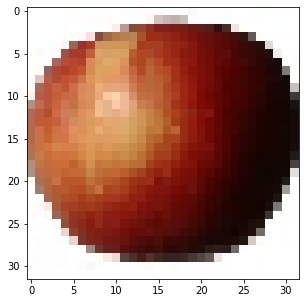

In [202]:
plt.figure(figsize=(5,5))
plt.imshow(array_to_img(X_frutas[0]))

In [203]:
Y_frutas[0]

0

In [204]:
len(X_frutas)

8329

In [205]:
len(Y_frutas)

8329

In [206]:
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)

In [207]:
X_train.shape

(8329, 32, 32, 3)

In [208]:
Y_train.shape

(8329,)

In [209]:
X_train = X_train/255

In [210]:
Y_train = to_categorical(Y_train, num_frutas)

In [211]:
Y_train.shape

(8329, 15)

In [212]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [213]:
# Cria o modelo
model = Sequential()
#Convolução 2D 
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#Convolução 2D
model.add(Conv2D(16, (5, 5), activation='relu'))
#Camada de Pooling 	    
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(AveragePooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_frutas, activation='softmax'))
#model.summary()

In [214]:
#plot_model(model, show_shapes=True, show_layer_names=True)

In [215]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [216]:
checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex8_1.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy')

history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=32, callbacks=[checkpointer], verbose=0)

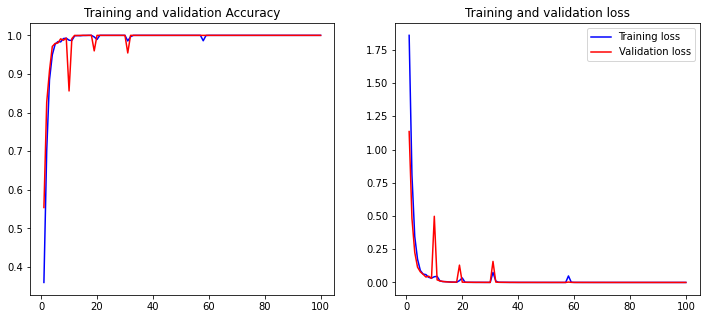

In [217]:
plot_history(history)

In [218]:
model = load_model("./modelo_mlp_ex8_1.hdf5")

In [219]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

ValueError: Data cardinality is ambiguous:
  x sizes: 6663
  y sizes: 8329
Please provide data which shares the same first dimension.

In [55]:
X_frutas, Y_frutas = get_dados(path_teste, num_frutas)

0 - 0 - Apple Braeburn - 164
1 - 24 - Carambula - 166
2 - 48 - Hazelnut - 157
3 - 72 - Orange - 160
4 - 96 - Plum 3 - 304


In [56]:
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)

In [57]:
X_test = X_test/255
Y_test = to_categorical(Y_test, num_frutas)

In [58]:
X_test.shape

(951, 32, 32, 3)

In [59]:
Y_test.shape

(951, 5)

In [60]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

Erro da CNN: 5.99%
Acurária da CNN: 94.01%


In [61]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Fim Execução : 
2021-07-19 16:57:41
